In [1]:
from ESPN_Manager.Manager import Manager
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import random
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

l19 = Manager(577577, 'djslocum13@gmail.com', 'aspen1983')

In [2]:
def manager_load_player_data(player, week):
    if player.position == "WR":
        return {
            "week": week,
            "name": player.name,
            "projected_points": player.projected_points,
            "actual_points": player.points,
            "point_diff": player.points - player.projected_points,
            "pro_team": player.proTeam,
            "position": player.position,
            "position_rank": player.posRank,
            "weekly_outlook": player.weeklyOutlook,
            "receptions": player.stats["receptions"],
            "rec_yards": player.stats["rec_yards"],
            "rec_tds": player.stats["rec_tds"],
            "rec_2pt_conversion": player.stats["rec_2pt_conversion"],
            "targets": player.stats["targets"],
            "rec_avg_yards": player.stats["rec_avg_yards"],
            "fumbles": player.stats["fumbles"],
            "receptions_proj": player.stats_projections["receptions"],
            "rec_yards_proj": player.stats_projections["rec_yards"],
            "rec_tds_proj": player.stats_projections["rec_tds"],
            "rec_2pt_conversion_proj": player.stats_projections["rec_2pt_conversion"],
            "targets_proj": player.stats_projections["targets"],
            "rec_avg_yards_proj": player.stats_projections["rec_avg_yards"],
            "fumbles_proj": player.stats_projections["fumbles"],
        }
    else:
        return {
            "week": week,
            "name": player.name,
            "projected_points": player.projected_points,
            "actual_points": player.points,
            "point_diff": player.points - player.projected_points,
            "pro_team": player.proTeam,
            "position": player.position,
            "position_rank": player.posRank,
            "weekly_outlook": player.weeklyOutlook,
        }      

box_score_data = []
box_score_data_pd = pd.DataFrame([])
for week in range(1, l19.current_week):
    try:
        data_pd = pd.read_csv("data/player_data_week_{}.csv".format(week))
        box_score_data_pd.append(data_pd)
    except:
        players = l19.get_box_player(week)
        week_data = []
        for p in players:
            d = manager_load_player_data(p, week)
            box_score_data.append(d)
            week_data.append(d)
        week_data = pd.DataFrame(week_data)
        week_data.to_csv("data/player_data_week_{}.csv".format(week), index=False)
        print("\nWeek {} data saved".format(week))
        time.sleep(random.random()*3)


Loading Week 8
# of Players Loaded: 100 200 300 400 500 600 700 800 900 
Week 8 data saved

Loading Week 9
# of Players Loaded: 100 200 300 400 500 600 700 800 900 
Week 9 data saved

Loading Week 10
# of Players Loaded: 100 200 300 400 500 600 700 800 900 
Week 10 data saved

Loading Week 11
# of Players Loaded: 100 200 300 400 500 600 700 800 900 
Week 11 data saved

Loading Week 12
# of Players Loaded: 100 200 300 400 500 600 700 800 900 
Week 12 data saved

Loading Week 13
# of Players Loaded: 100 200 300 400 500 600 700 800 900 
Week 13 data saved


In [37]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [40]:
box_score_data_pd = pd.DataFrame([])
for week in range(1, l19.current_week):
    data_pd = pd.read_csv("data/player_data_week_{}.csv".format(week))
    box_score_data_pd = box_score_data_pd.append(data_pd)

box_score_data_pd = box_score_data_pd.reset_index().drop(['index'], axis=1)
box_score_data_pd.loc[lambda df: df.projected_points > 1]

,actual_points,fumbles,fumbles_proj,name,point_diff,position,position_rank,pro_team,projected_points,rec_2pt_conversion,rec_2pt_conversion_proj,rec_avg_yards,rec_avg_yards_proj,rec_tds,rec_tds_proj,rec_yards,rec_yards_proj,receptions,receptions_proj,targets,targets_proj,week,weekly_outlook
0,22.0,0.0,0.045436,Michael Thomas,3.66,WR,1,NO,18.34,0.0,0.030282,12.300,11.570485,0.0,0.550059,123.0,81.768047,10.0,7.066950,13.0,9.096609,1,Thomas has been in the NFL for three seasons a...
1,13.0,NaN,NaN,Ezekiel Elliott,-7.59,RB,5,DAL,20.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,An absolute workhorse since entering the NFL i...
2,15.0,0.0,0.041613,Julio Jones,-1.36,WR,6,ATL,16.36,0.0,0.019056,5.167,14.302368,1.0,0.416376,31.0,84.269820,6.0,5.892019,11.0,9.135325,1,Say what you want about Jones' occasional touc...
3,31.0,0.0,0.046875,DeAndre Hopkins,11.70,WR,7,HOU,19.30,0.0,0.020663,13.875,13.616463,2.0,0.573274,111.0,94.089544,8.0,6.909984,13.0,10.515186,1,Hopkins has been the No. 2 scoring fantasy wid...
4,25.0,NaN,NaN,Dalvin Cook,9.34,RB,2,MIN,15.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Now two seasons into his NFL career, Cook has ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0.0,0.0,0.006843,Marcell Ateman,-2.65,WR,163,OAK,2.65,0.0,0.002928,0.000,12.759856,0.0,0.081288,0.0,14.892373,0.0,1.167127,0.0,1.897199,13,NaN
9591,0.0,NaN,NaN,Hale Hentges,-1.16,TE,77,WSH,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN
9597,0.0,NaN,NaN,Johnny Mundt,-2.92,TE,97,LAR,2.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN
9608,0.0,0.0,0.008000,Cody Core,-3.04,WR,174,NYG,3.04,0.0,0.007708,0.000,12.720571,0.0,0.113240,0.0,17.355654,0.0,1.364377,0.0,2.393514,13,NaN


In [35]:
box_score_data_pd.groupby(['name', 'position']).agg({'projected_points': 'sum', 'actual_points': 'sum', 'point_diff': 'sum'}).sort_values('point_diff', ascending=False).loc[lambda df: df.projected_points >= 75][:10]

,,projected_points,actual_points,point_diff
name,position,,,
Patriots D/ST,DST,91.50,191.0,99.50
49ers D/ST,DST,81.13,160.0,78.87
Lamar Jackson,QB,244.68,316.0,71.32
Christian McCaffrey,RB,283.60,343.0,59.40
Steelers D/ST,DST,80.59,139.0,58.41
Chris Godwin,WR,181.54,239.0,57.46
DeVante Parker,WR,114.54,168.0,53.46
Austin Ekeler,RB,169.41,222.0,52.59
Austin Hooper,TE,102.61,150.0,47.39


In [43]:
l19.get_box_player(0)


Loading Week 14
# of Players Loaded: 100 200 300 400 500 600 700 800 900 

[Player(Christian McCaffrey, points:24, projected:27),
 Player(Michael Thomas, points:30, projected:21),
 Player(Ezekiel Elliott, points:23, projected:17),
 Player(Travis Kelce, points:17, projected:15),
 Player(Julio Jones, points:11, projected:16),
 Player(DeAndre Hopkins, points:26, projected:16),
 Player(Alvin Kamara, points:5, projected:18),
 Player(Tyreek Hill, points:12, projected:15),
 Player(Davante Adams, points:8, projected:16),
 Player(Saquon Barkley, points:9, projected:16),
 Player(Patrick Mahomes, points:13, projected:17),
 Player(Lamar Jackson, points:19, projected:21),
 Player(George Kittle, points:18, projected:17),
 Player(Deshaun Watson, points:27, projected:19),
 Player(Nick Chubb, points:12, projected:16),
 Player(Leonard Fournette, points:9, projected:19),
 Player(Amari Cooper, points:20, projected:14),
 Player(Todd Gurley II, points:20, projected:14),
 Player(Zach Ertz, points:30, projected:14),
 Player(Aaron Jones, points:30, projected:15),
 Player(Russell Wils

In [98]:
def get_box_player(week: int=None):
    params = {
        'view': 'kona_player_info',
        'scoringPeriodId': week,
    }
    box_player = []
    more_players = True
    offset = 0
    limit = 100
    count = 0
    print("\nLoading Week {}".format(week))
    print("# of Players Loaded: ", end="")
    while more_players:
        filters = {"players": {
            "filterSlotIds": {"value": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 23, 24]},
            "filterProTeamIds": {"value": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34]},
            "sortPercOwned": {"sortPriority": 3, "sortAsc": False},
            "filterStatsForCurrentSeasonScoringPeriodId": {"value": [week]}, "limit": limit, "offset": offset,
            "sortAppliedStatTotalForScoringPeriodId": {"sortAsc": False, "sortPriority": 1, "value": 7},
            "filterRanksForScoringPeriodIds": {"value": [7]}, "filterRanksForRankTypes": {"value": ["PPR"]}}}
        headers = {'x-fantasy-filter': json.dumps(filters)}
        
        url = "https://fantasy.espn.com/apis/v3/games/ffl/seasons/2019/segments/0/leaguedefaults/3?view=kona_player_info"

        r = requests.get(url, params=params, cookies=l19.cookies, headers=headers)

        players = r.json()['players']
        DEFAULT_POSITION_MAP = {
            1: 'QB',
            2: 'RB',
            3: 'WR',
            4: 'TE',
            5: 'K',
            16: 'DST'
        }
        if len(players) > 0:
            pro_schedule = l19._get_nfl_schedule(week)
            positional_rankings = l19._get_positional_ratings(week)
            for player in players:
                name = player['player']['fullName']
                pos = DEFAULT_POSITION_MAP[player['player']['defaultPositionId']]
                for p in player['player']['stats']:
                    if p['seasonId'] == 2019 and p['scoringPeriodId'] == 0:
                        if p['statSourceId'] == 1:
                            projected = p['appliedTotal']
                        else:
                            actual = p['appliedTotal']
                box_player.append({"name": name, 'pos': pos, "projected": projected, "actual": actual})
            offset += limit
        else:
            more_players = False

        count += 1
        if count > 30:
            print("Capping the amount of players. Potential While Loop error.")
            more_players = False

        print(limit*count, end=" ")
        time.sleep(random.random()*3)

    return box_player

In [99]:
import requests
import json
from ESPN_Manager.ff_espn_api.box_player import BoxPlayer

In [100]:
data = get_box_player(0)


Loading Week 0
# of Players Loaded: 100 200 300 400 500 600 700 800 900 

In [103]:
d = pd.DataFrame(data)
d['point_diff'] = d.actual - d.projected
d.set_index(['name', 'pos']).sort_values('point_diff', ascending=False).loc[lambda df: df.projected <= 75][:10]

,,projected,actual,point_diff
name,pos,,,
Gardner Minshew II,QB,15.700529,204.74,189.039471
Ryan Tannehill,QB,17.245088,206.26,189.014912
Kyle Allen,QB,0.000000,167.18,167.180000
Zach Pascal,WR,5.824106,132.90,127.075894
Darius Slayton,WR,37.706591,161.00,123.293409
Raheem Mostert,RB,31.672807,144.90,113.227193
Mason Rudolph,QB,4.660504,108.80,104.139496
Tyler Higbee,TE,37.332055,138.00,100.667945
Diontae Johnson,WR,53.749970,153.70,99.950030


In [110]:
import seaborn as sns
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot
jtplot.style()

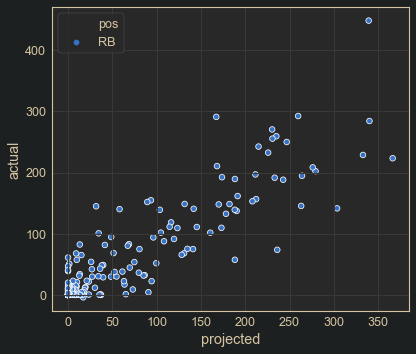

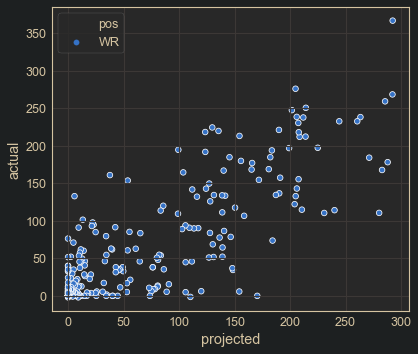

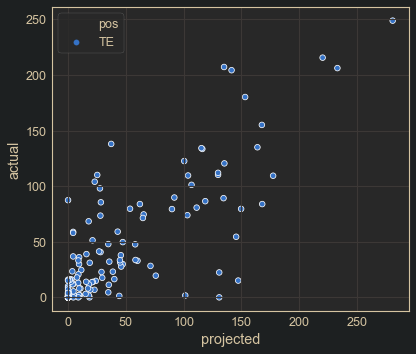

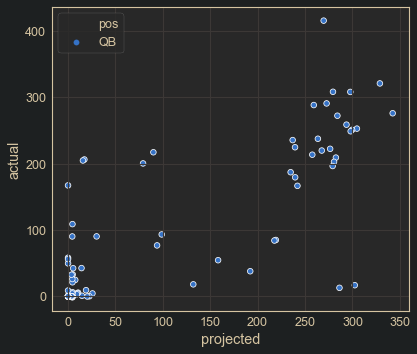

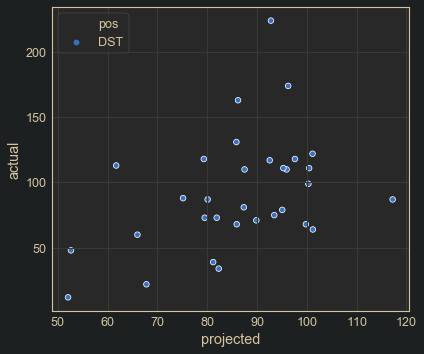

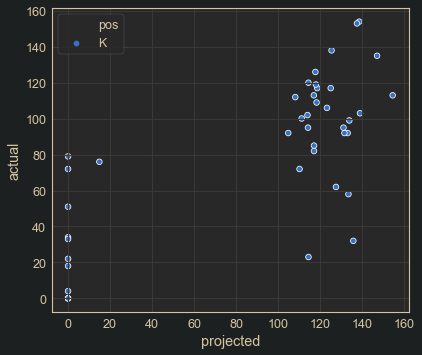

In [132]:
for pos in d.pos.unique():
    sat = sns.scatterplot("projected", "actual", hue="pos", data=d.sort_values('projected', ascending=False).loc[lambda df: (df.pos == pos)])
    sat.legend(loc=2)
    plt.show()

In [1]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot
jtplot.style()

from ESPN_Manager.Manager import Manager
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import random
from scipy import stats
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
sns.set_style("whitegrid")

In [9]:
l = Manager(577577, 'djslocum13@gmail.com', 'aspen1983', 2019)

In [54]:
player_data = pd.DataFrame([])
for week in range(1, 17):
    print(week, end=" ")
    l.load_roster_week(week)
    weekly_data = [l.manager_load_player_data(player, team, week) for team in l.teams for player in team.roster]
    player_data = player_data.append(weekly_data)
print('\n')
data = pd.DataFrame(player_data)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 



[Text(0, 0, 'mac steffen'),
 Text(0, 0, 'Bryan Kong'),
 Text(0, 0, 'Nathan Weiner'),
 Text(0, 0, 'ZACK TOWNSEND'),
 Text(0, 0, 'Vinay Gupta'),
 Text(0, 0, 'B Murph'),
 Text(0, 0, 'Danny Slocum'),
 Text(0, 0, 'Hunter Biggs')]

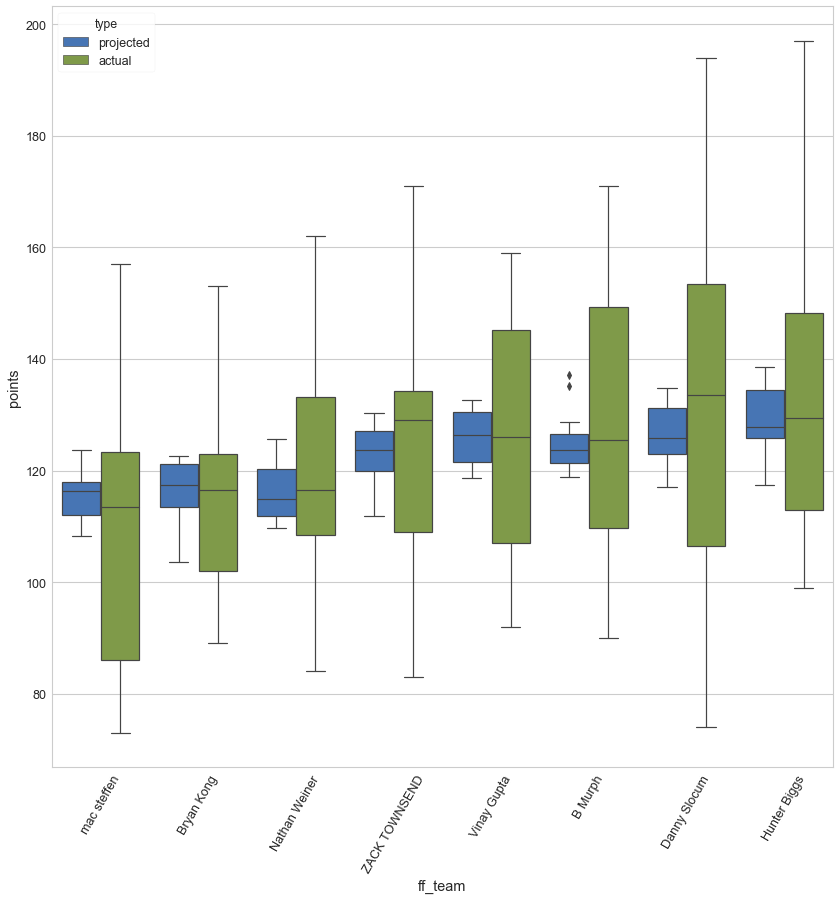

In [59]:
start_data = data.loc[lambda x: (x.week < 13)&(x.current_slot != "BE")]
weekly_start_data = start_data.groupby(['ff_team','week']).agg({"projected_points": 'sum',"actual_points": 'sum', "point_diff": 'sum'}).reset_index()
year_vals = weekly_start_data.groupby('ff_team').agg({"projected_points": "mean","actual_points": "mean", "point_diff": "sum"})
order = year_vals.sort_values('actual_points').index

weekly_start_data_1 = weekly_start_data[['ff_team','projected_points']]
weekly_start_data_1.columns = ['ff_team','points']
weekly_start_data_1['type'] = 'projected'
weekly_start_data_2 = weekly_start_data[['ff_team','actual_points']]
weekly_start_data_2.columns = ['ff_team','points']
weekly_start_data_2['type'] = 'actual'
weekly_start_data_3 = weekly_start_data_1.append(weekly_start_data_2)

plt.subplots(figsize=(14, 14))
ax = sns.boxplot("ff_team", "points", data=weekly_start_data_3, order=order, hue="type")
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

In [52]:
year_vals

,projected_points,actual_points,point_diff
ff_team,,,
B Murph,125.471875,123.2500,-35.55
Bryan Kong,116.678750,118.3750,27.14
Danny Slocum,126.173750,134.2500,129.22
Hunter Biggs,130.939375,133.2500,36.97
Nathan Weiner,113.557500,109.2500,-68.92
Vinay Gupta,124.841250,124.1875,-10.46
ZACK TOWNSEND,123.053750,126.7500,59.14
mac steffen,117.655625,116.5625,-17.49


In [2]:
def get_year_stats(year):
    l = Manager(577577, 'djslocum13@gmail.com', 'aspen1983', year)
    player_data = l.manager_get_rostered_player_data()

    bench_data = player_data.loc[lambda df: df.current_slot == "BE"]
    start_data = player_data.loc[lambda df: df.current_slot != "BE"]

    weekly_start_data = start_data.groupby(['ff_team','week']).agg({"projected_points": 'sum',"actual_points": 'sum', "point_diff": 'sum'}).reset_index()
    year_vals = weekly_start_data.groupby('ff_team').agg({"projected_points": "mean","actual_points": "mean", "point_diff": "sum"})
    order = year_vals.sort_values('actual_points').index

    weekly_start_data_1 = weekly_start_data[['ff_team','projected_points']]
    weekly_start_data_1.columns = ['ff_team','points']
    weekly_start_data_1['type'] = 'projected'
    weekly_start_data_2 = weekly_start_data[['ff_team','actual_points']]
    weekly_start_data_2.columns = ['ff_team','points']
    weekly_start_data_2['type'] = 'actual'
    weekly_start_data_3 = weekly_start_data_1.append(weekly_start_data_2)
    
    plt.subplots(figsize=(14, 14))
    ax = sns.boxplot("ff_team", "points", data=weekly_start_data_3, order=order, hue="type")
    ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

    return player_data, year_vals, weekly_start_data_3

Loading 13 weeks of data
Loading Week 1 2 3 4 5 6 7 8 9 10 11 12 13 



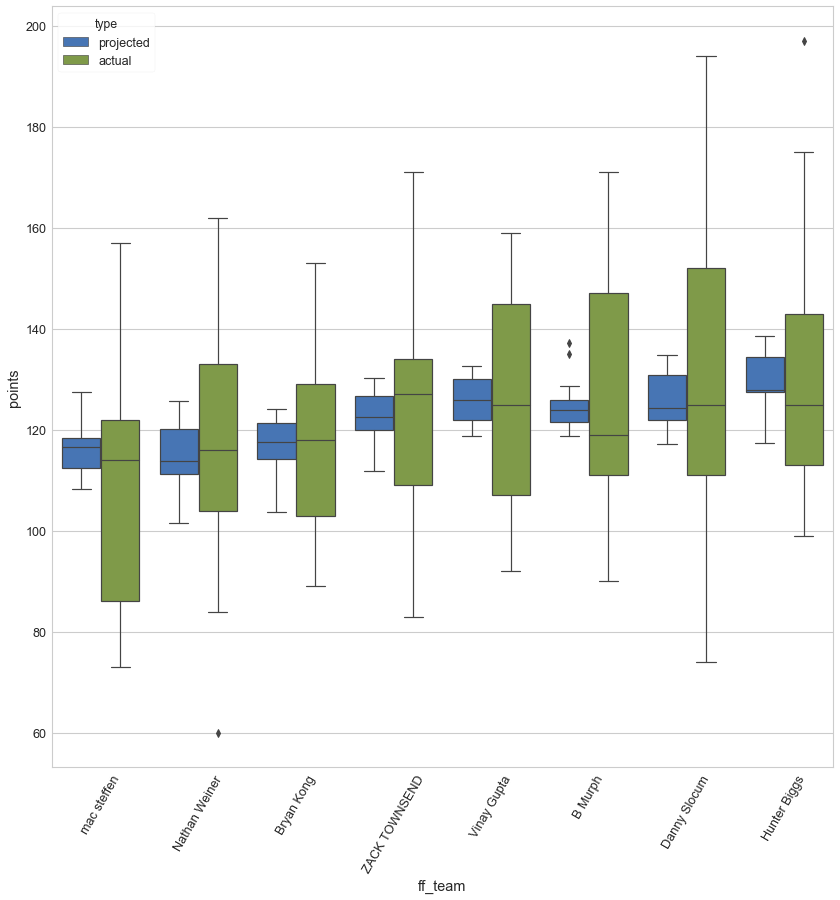

In [3]:
x,y,z = get_year_stats(2019)

In [4]:
y

,projected_points,actual_points,point_diff
ff_team,,,
B Murph,125.151538,127.692308,33.03
Bryan Kong,116.798462,117.769231,12.62
Danny Slocum,125.957692,131.769231,75.55
Hunter Biggs,129.148462,133.769231,60.07
Nathan Weiner,114.897692,114.153846,-9.67
Vinay Gupta,125.559231,124.923077,-8.27
ZACK TOWNSEND,122.685385,124.846154,28.09
mac steffen,116.233077,110.000000,-81.03


Loading 16 weeks of data
Loading Week 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 



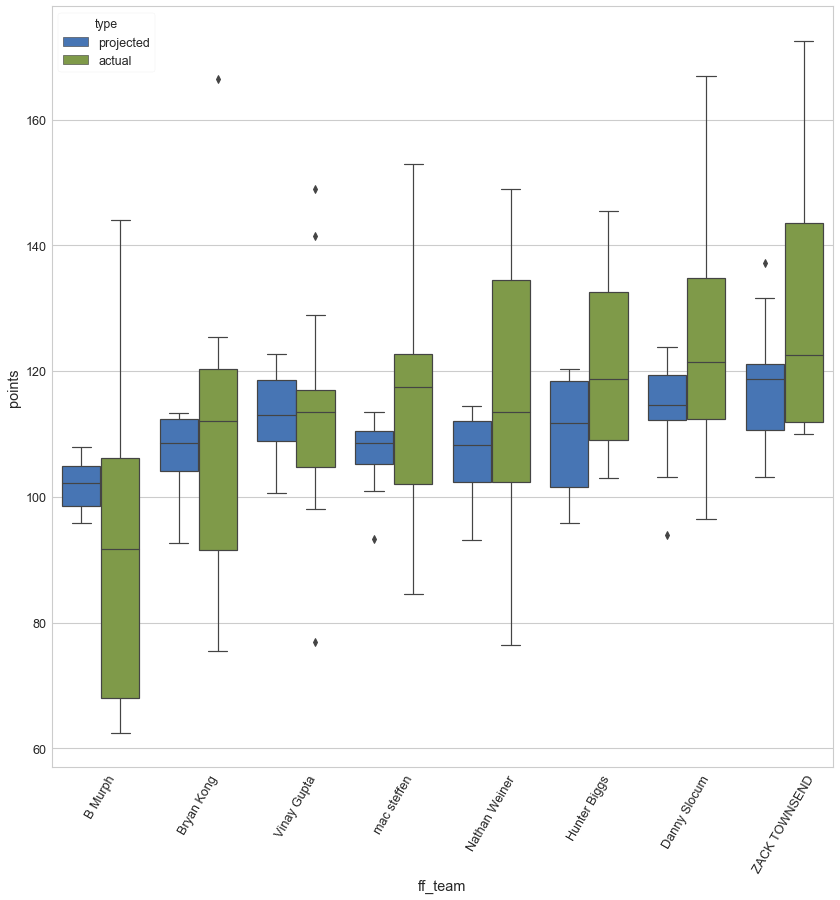

In [5]:
x,y,z = get_year_stats(2018)

In [7]:
y

,projected_points,actual_points,point_diff
ff_team,,,
B Murph,101.649375,91.93750,-155.39
Bryan Kong,107.053750,108.59375,24.64
Danny Slocum,114.018125,125.12500,177.71
Hunter Biggs,110.902500,120.59375,155.06
Nathan Weiner,106.786250,115.87500,145.42
Vinay Gupta,112.666875,113.46875,12.83
ZACK TOWNSEND,117.602500,130.03125,198.86
mac steffen,107.499375,113.71875,99.51


3 4 5 6 7 8 9 10 11 12 13 



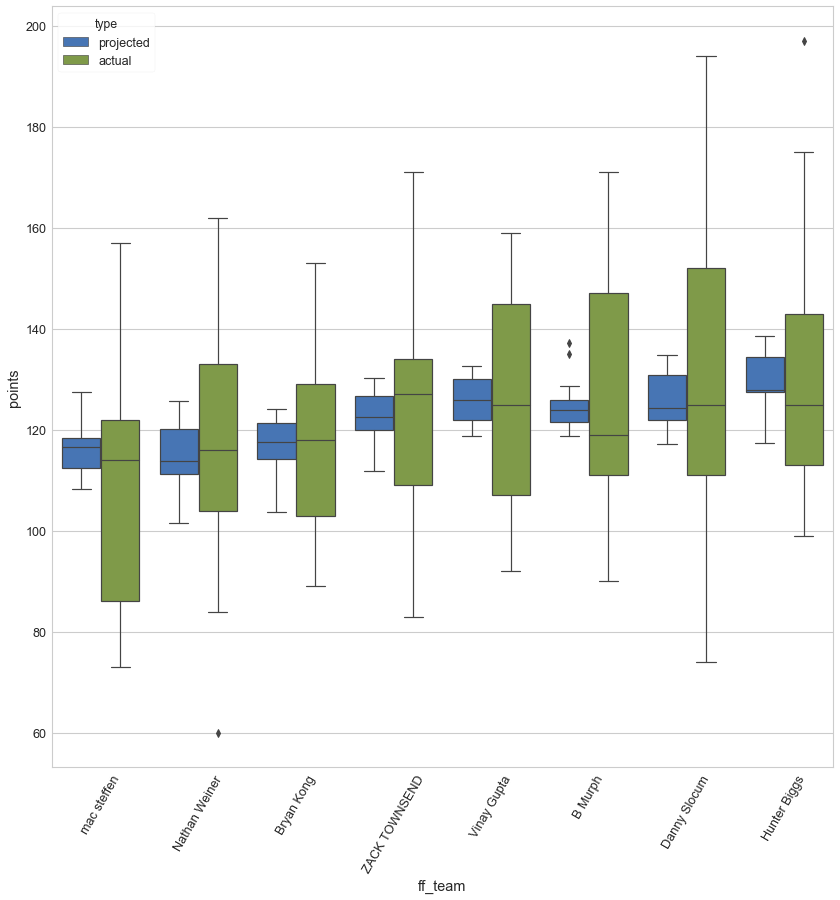

In [6]:
x

,player,year,week,ff_team,name,projected_points,actual_points,point_diff,pro_team,position,current_slot,position_rank,weekly_outlook
0,Player(LeSean McCoy),2017,1,ZACK TOWNSEND,LeSean McCoy,0,0,0,BUF,RB,BE,[],[]
1,Player(Brandin Cooks),2017,1,ZACK TOWNSEND,Brandin Cooks,0,0,0,LAR,WR,BE,[],[]
2,Player(Doug Baldwin),2017,1,ZACK TOWNSEND,Doug Baldwin,0,0,0,SEA,WR,BE,[],[]
3,Player(Alshon Jeffery),2017,1,ZACK TOWNSEND,Alshon Jeffery,0,0,0,PHI,WR,BE,[],[]
4,Player(Drew Brees),2017,1,ZACK TOWNSEND,Drew Brees,0,0,0,NO,QB,BE,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Player(Branden Oliver),2017,16,Hunter Biggs,Branden Oliver,0,0,0,LAC,RB,BE,[],[]
1996,Player(Corey Clement),2017,16,Hunter Biggs,Corey Clement,0,0,0,PHI,RB,BE,[],[]
1997,Player(Wayne Gallman),2017,16,Hunter Biggs,Wayne Gallman,0,0,0,NYG,RB,BE,[],[]
1998,Player(Dede Westbrook),2017,16,Hunter Biggs,Dede Westbrook,0,0,0,JAX,WR,BE,[],[]


In [68]:
import requests

week = 7
r = requests.get("https://fantasy.espn.com/apis/v3/games/ffl/seasons/2019/segments/0/leagues/577577?view=mPositionalRatingsStats&scoringPeriodId=" + str(week), cookies=l19.cookies)
r

r.json()['scoringPeriodId']

r.json()['positionAgainstOpponent']['positionalRatings']['1']['average']

